In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.10.0


In [2]:
data = np.load('olivetti_faces.npy')
target = np.load('olivetti_faces_target.npy')

In [3]:
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


In [4]:
def show_a_random_face_per_class(images, unique_ids):
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18,9))
    axarr = axarr.flatten()

    rand = np.random.randint(10)
    for unique_id in unique_ids:
        image_index=unique_id*10+rand
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title('class id:{}'.format(unique_id))
    plt.suptitle('40 distinct people/classes in the dataset')

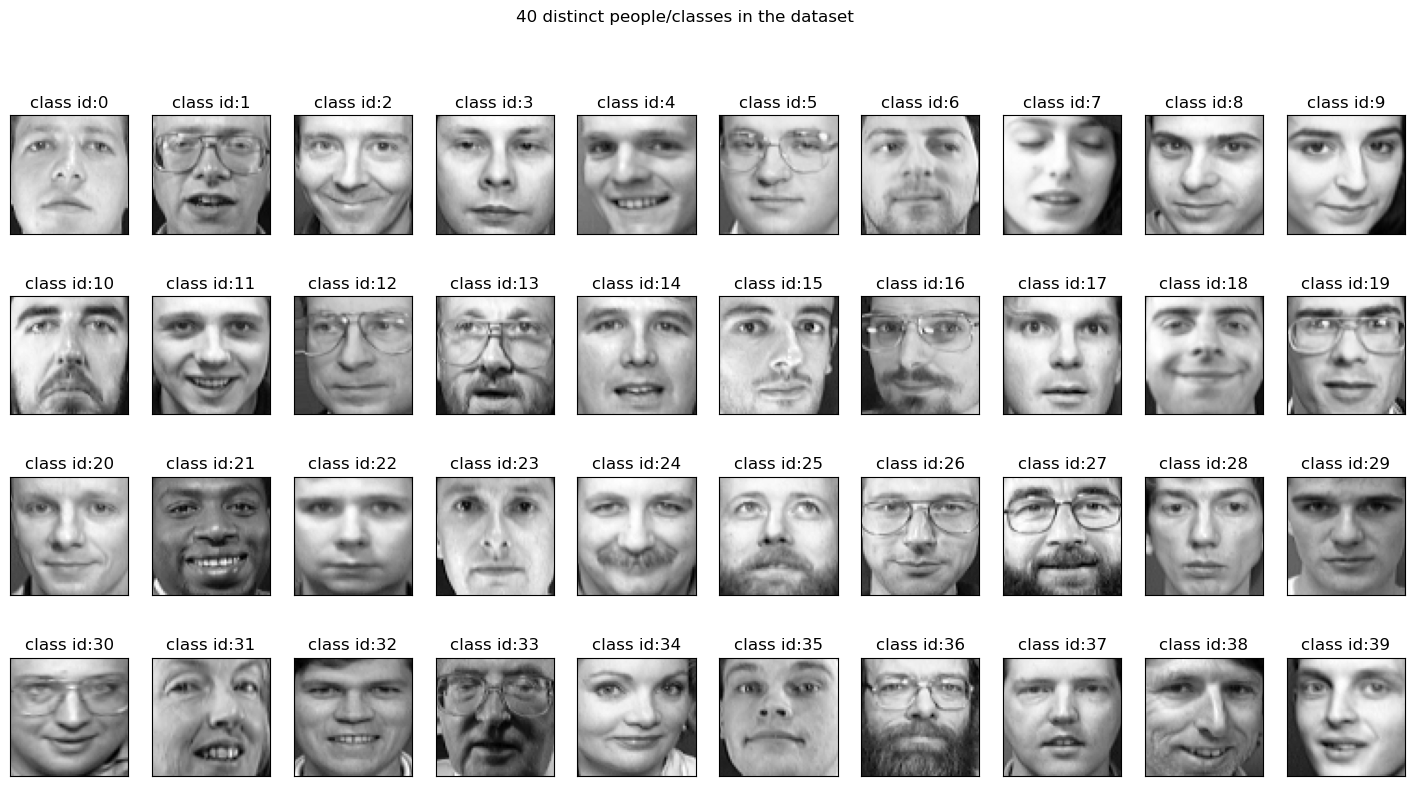

In [5]:
show_a_random_face_per_class(data, np.unique(target))

In [9]:
def show_all_faces_of_selected_subjects(images, subject_ids):
    cols = 10
    rows = (len(subject_ids)*10) / cols
    rows = int(rows)

    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index = subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap='gray')
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title('class id:{}'.format(subject_id))

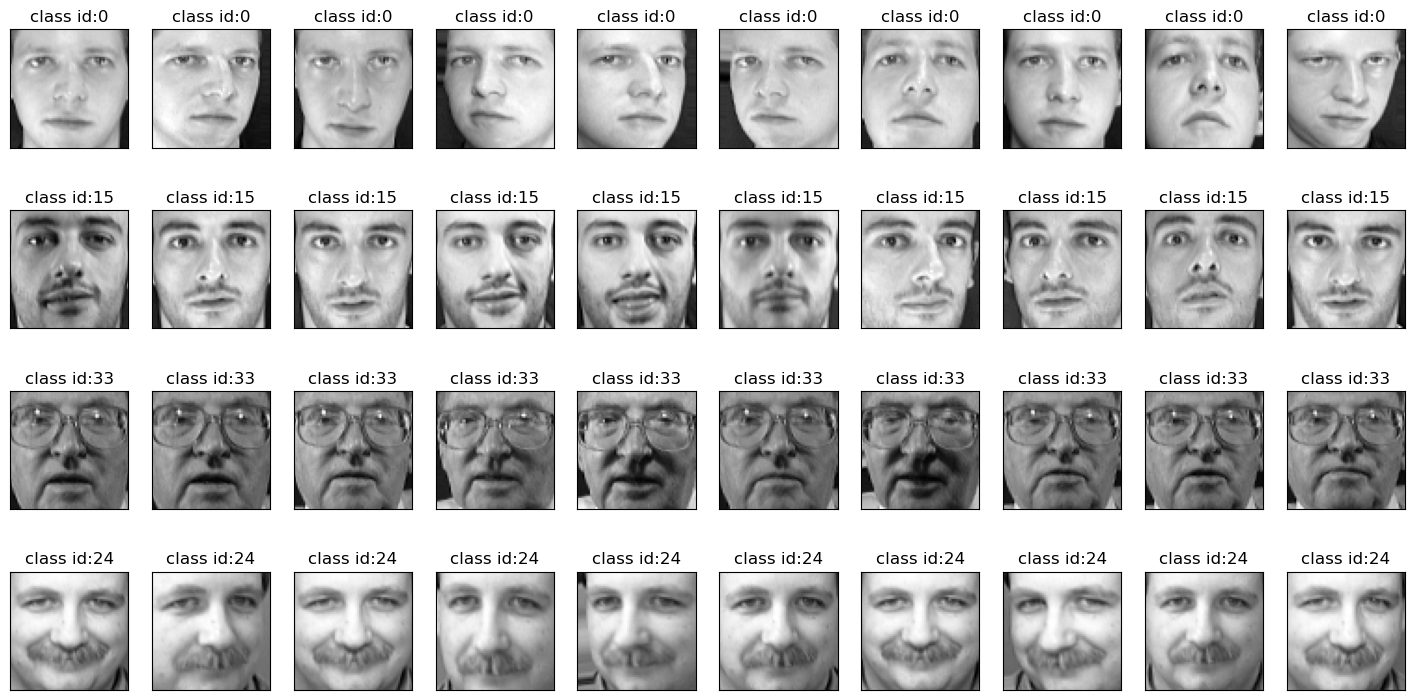

In [10]:
show_all_faces_of_selected_subjects(images=data,subject_ids=[0,15,33,24])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=42)

In [12]:
print(X_train[0:1].shape, X_train[0:1])

(1, 64, 64) [[[0.1983471  0.19421488 0.19421488 ... 0.58264464 0.5123967  0.45867768]
  [0.21900827 0.21900827 0.21487603 ... 0.5661157  0.5123967  0.45041323]
  [0.23966943 0.23966943 0.23966943 ... 0.59090906 0.5        0.46280992]
  ...
  [0.13636364 0.14049587 0.16115703 ... 0.76033056 0.7644628  0.7355372 ]
  [0.14876033 0.14876033 0.14876033 ... 0.76033056 0.75619835 0.74380165]
  [0.14876033 0.14876033 0.14876033 ... 0.75206614 0.75206614 0.73966944]]]


In [13]:
print(y_train.shape, y_train)

(320,) [ 0  1 20 25 27  6 24 30 10  9 23 33 11 22 18 31 37 38 23  7 24 11  1  6
 15  0  1 13 35 34 13 38 29 38 29  6  7 28 30 28 15 10  1 34  2 17 35 33
 16 24 31 14 25 17 11 19 22 26 21 30  3 13 29 15 19 28  5 11 16 36  0 33
 27 15  1 19 10  8 31 39 37 20 28 16 35  8 37 16 14 22  9  6 12  9 14 32
  9 23  6  2  3 14 12 18  6 19 32 21 31 19 12 14 37  8 33 34 33 35 33 30
 18 20 28 21 28 12  3  1 32 18 22 11 17 32 29 11 36 27 38 28 36 16 25 13
 15 19 19 39  0 20 11 23 23  2 12 35 22 36 37 35 37 12  7 32  2  8 38 10
 24 29 13 24 18 29  4 36  6  8 24 18 15  1  3  2 17 14 31 27 22  9  5 24
 29 30 17  4 31 20 25 33  0 25 35 10 22 34 21 17  9 21  6  4  3 26 20 35
  2 31 23 26 28 16 37 13  6 13 12  0  6 30  1 15  4 36 32 21 27 34 23 20
 21 29 36 25 39 36 30 26 20 16  4 21 19 30 25 10  5  0  4  8 20  3 26  9
 33  5 34 26 24  1 31  8 27 16 32 39 13 30 38 31 24  5  5 17 18 39 18 16
  5  4 34 23 25  2 31 16 27 19 29 34 25 30 14 13 15 35  9 37  8 33 21 12
 39  2 18  7 10 27 34 10]


In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,1), name='Input'),
    keras.layers.Dense(40, name='Output')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 4096)              0         
                                                                 
 Output (Dense)              (None, 40)                163880    
                                                                 
Total params: 163,880
Trainable params: 163,880
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=1)

Epoch 1/300
8/8 [==============================] - 1s 71ms/step - loss: 4.9064 - accuracy: 0.0195 - val_loss: 4.8738 - val_accuracy: 0.0469
Epoch 2/300
8/8 [==============================] - 0s 26ms/step - loss: 4.1402 - accuracy: 0.0781 - val_loss: 3.7686 - val_accuracy: 0.1094
Epoch 3/300
8/8 [==============================] - 0s 25ms/step - loss: 3.5305 - accuracy: 0.1484 - val_loss: 3.6068 - val_accuracy: 0.1562
Epoch 4/300
8/8 [==============================] - 0s 5ms/step - loss: 3.0909 - accuracy: 0.2500 - val_loss: 3.3593 - val_accuracy: 0.2656
Epoch 5/300
8/8 [==============================] - 0s 16ms/step - loss: 2.8076 - accuracy: 0.4219 - val_loss: 2.8925 - val_accuracy: 0.4219
Epoch 6/300
8/8 [==============================] - 0s 47ms/step - loss: 2.5778 - accuracy: 0.4570 - val_loss: 2.9499 - val_accuracy: 0.3281
Epoch 7/300
8/8 [==============================] - 0s 48ms/step - loss: 2.3387 - accuracy: 0.5391 - val_loss: 2.7391 - val_accuracy: 0.5000
Epoch 8/300
8/8 [====

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


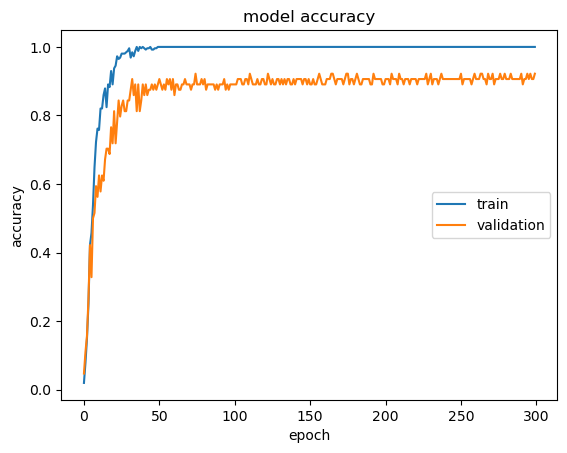

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

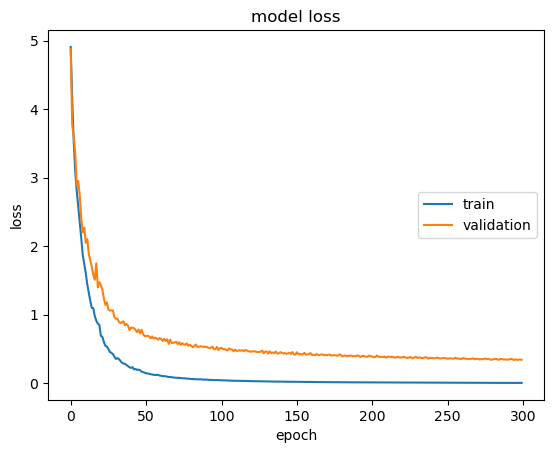

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 0.3954 - accuracy: 0.9000 - 176ms/epoch - 59ms/step

Test accuracy: 0.8999999761581421


In [25]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

3/3 [==============================] - 0s 1ms/step


array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12, 37, 36,  0,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 29, 19, 26,  5,
       23, 11, 11, 24, 15, 14, 38,  5,  7,  2,  8, 28, 14, 18,  2, 17,  4,
       32, 33, 38, 37,  3, 22, 17,  3, 15, 12, 29, 25,  0, 10,  3, 35, 26,
       37,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[2, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 1, 0, 2]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(data)
Acc = []

In [29]:
def baseModel(x_train, y_train):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(64,64,1), name='input'),
        keras.layers.Dense(128, activation='sigmoid', name='hidden'),
        keras.layers.Dense(40, name='output'),
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    model.fit(x_train, y_train,validation_split=0.2, epochs=300, verbose=0)
    return(model)

In [31]:
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    base = baseModel(X_train,y_train)
    y_pred=base.predict(X_test)
    y_pred=np.argmax(y_pred,axis=1)
    Acc.append(accuracy_score(y_test, y_pred))

2/2 [==============================] - 0s 2ms/step


In [32]:
print(Acc, np.mean(Acc), np.std(Acc))

[0.7, 0.9, 0.75, 0.825, 0.875, 0.85, 0.7, 0.8, 0.7, 0.75] 0.785 0.07176350047203663


In [38]:
def baseModel(x_train,y_train):
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 1),name="Input"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='sigmoid',name="Hidden", kernel_regularizer=keras.regularizers.l2(l=0.001)),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(40, name="Output"),
])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    model.fit(x_train, y_train, validation_split=0.2, epochs=300,verbose=0)
    return(model)

In [40]:
Acc = []
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    base = baseModel(X_train,y_train)
    y_pred = np.argmax(base.predict(X_test), axis=-1)
    Acc.append(accuracy_score(y_test, y_pred))
print(Acc,np.mean(Acc),np.std(Acc))



2/2 [==============================] - 0s 3ms/step
[0.75, 0.625, 0.925, 0.75, 0.8, 0.7, 0.75, 0.75, 0.85, 0.8] 0.7699999999999999 0.07729812416870155
